# deeptrack.pytorch.data

<a href="https://colab.research.google.com/github/DeepTrackAI/DeepTrack2/blob/develop/tutorials/3-advanced-topics/DTAT393B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install deeptrack  # Uncomment if running on Colab/Kaggle.

This advanced tutorial introduces the pytorch.data module and follows closely the [`DTGS111_datafiles`](https://github.com/DeepTrackAI/DeepTrack2/blob/develop/tutorials/1-getting-started/DTGS111_datafiles.ipynb) tutorial but focuses more on the functionality of the `Dataset` class.

## 1. What is `pytorch.data`?

The `pytorch.data` module provides a class named `Dataset`, which extends the [`PyTorch Dataset`](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html) class through direct inheritance. The DeepTrack2 `Dataset` class provides functions such as `__getitem__()` and `__len__()` which are function similarily to `PyTorch Dataset`.

It can take a pipeline as an argument, letting you integrate transformations and augmentations.



## 2. Downloading a dataset


In [ ]:
import os

import deeptrack as dt
import numpy as np
from torchvision.datasets.utils import download_url, _extract_zip


dataset_path = os.path.join(".", "blood_smears_dataset")
if not os.path.exists(dataset_path):
    url = "https://data.lhncbc.nlm.nih.gov/public/Malaria/cell_images.zip"
    download_url(url, ".")
    _extract_zip("cell_images.zip", dataset_path, None)
    os.remove("cell_images.zip")

## 3. Use `Source` to provide metadata about the data

In [3]:
files = dt.sources.ImageFolder(root=os.path.join(dataset_path, "cell_images"))
print(f"Dataset contains {len(files)} images")
print(f"There are {len(files)} files.")
print(f"The first file is {files[0]}.")

Dataset contains 27558 images
There are 27558 files.
The first file is SourceItem({'path': '.\\blood_smears_dataset\\cell_images\\Parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png', 'label': 0, 'label_name': 'Parasitized'}).


## 3. Combining sources with features

In [4]:
loader = dt.LoadImage(path=files.path)
label_pipeline = dt.Value(value=files.label)

loader_pipeline = (
    loader 
    >> dt.Resize((32, 32))
    >> dt.Divide(255)
)

data_pipeline = loader_pipeline & label_pipeline

## 4. Creating a PyTorch Dataset
Finally, you implement the DeepTrack2 `Dataset` class by combining it with the data pipeline and the source of the files.

Length of dataset: 27558
Item type: <class 'tuple'>
Shape of tensors: torch.Size([3, 32, 32])
tensor([1, 2, 3])


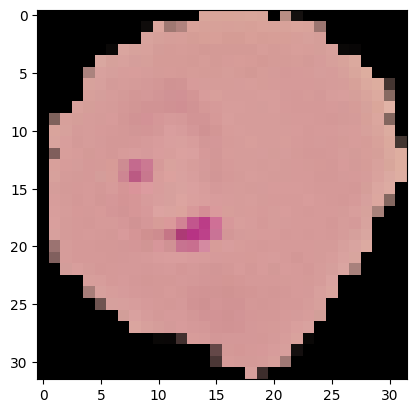

In [5]:
from matplotlib import pyplot as plt
import torch

dataset = dt.pytorch.Dataset(data_pipeline, files)

# Print some information about the contents.
print(f"Length of dataset: {dataset.__len__()}")
item = dataset.__getitem__(np.random.randint(100))

print(f"Item type: {type(item)}")

tensor = item[0]
print(f"Shape of tensors: {tensor.shape}")

# Permute to make it plottable.
tensor = torch.permute(tensor, (1, 2, 0))
plt.imshow(tensor)

# Additional utility to convert to a tensor.
numpy_array = np.array([1, 2, 3])
torch_tensor = dataset._as_tensor(numpy_array)

print(torch_tensor)